<a href="https://colab.research.google.com/github/Ganeshkumbara/Pytorch-NeuralNetwork/blob/main/Pytorch_%7C_Neural_Network_%7C_Convolutional_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pytorch

---



In [ ]:
!pip install torch torchvision
!pip install scikit-image

**Documentation** [link](https://pyimagesearch.com/2021/07/05/what-is-pytorch/)

In [1]:
import torch
import numpy as np

In [2]:
torch.__version__

'2.6.0+cpu'

**PyTorch represents multi-dimensional arrays as “tensors.” Tensors form the fundamental building blocks of a neural network**

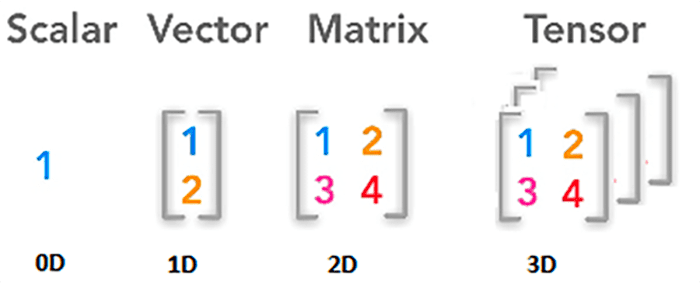

- If you have a 1D array like np.array([1, 2, 3]), np.shape will return (3,), indicating it has 3 elements.
- For a 2D array like np.array([[1, 2], [3, 4]]), it will return (2, 2), indicating it has 2 rows and 2 columns.
- For a 3D array like np.array([[[1], [2]], [[3], [4]]]), it will return (2, 2, 1), indicating it has 2 blocks, each containing 2 rows and 1 column.

In [3]:
image_blank = np.random.rand(2, 3, 4) # height, width, channel

In [4]:
image_blank

array([[[0.75542894, 0.00960127, 0.69862288, 0.00334064],
        [0.06756904, 0.66878451, 0.28817833, 0.35981304],
        [0.64131228, 0.33047828, 0.56903553, 0.21995737]],

       [[0.40971419, 0.04621168, 0.96308132, 0.69445487],
        [0.68582231, 0.90834009, 0.34088258, 0.22879446],
        [0.83817612, 0.06396088, 0.01063427, 0.61452123]]])

- image[:, :, 0] accesses all rows and columns of the first channel (red).
- image[:, :, 1] accesses all rows and columns of the second channel (green).
- image[:, :, 2] accesses all rows and columns of the third channel (blue).
- image[:, :, 3] accesses all rows and columns of the fourth channel (alpha).

In [5]:
image_blank[:,:,0]

array([[0.75542894, 0.06756904, 0.64131228],
       [0.40971419, 0.68582231, 0.83817612]])

In [6]:
np_array = np.array([[0.0, 1.3], [2.8, 3.3], [4.1, 5.2], [6.9, 7.0]])

In [7]:
np_array.shape

(4, 2)

In [8]:
pyt_array = torch.tensor([[0.0, 1.3], [2.8, 3.3], [4.1, 5.2], [6.9, 7.0]])

In [9]:
pyt_array.shape

torch.Size([4, 2])

# Neural Network

---



- Defining your neural network architecture
- Initializing your optimizer and loss function
- Looping over your number of training epochs
-Looping over data batches inside each epoch
-Making predictions and computing the loss on the current batch of data
-Zeroing out your gradient
-Performing backpropagation
-Telling your optimizer to update the gradients of your network
-Telling PyTorch to train your network with a GPU (if a GPU is available on your machine, of course)




# Multilayer Preceptron (MLP)

A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of nodes (neurons). Here's a breakdown of its key features:
- Architecture: MLPs have an input layer, one or more hidden layers, and an output layer. Each layer is fully connected to the next one, meaning every neuron in one layer is connected to every neuron in the following layer.
- Activation Functions: Neurons in MLPs use activation functions (like ReLU, sigmoid, or tanh) to introduce non-linearity into the model, allowing it to learn complex patterns.
- Feedforward Process: Data flows in one direction—from the input layer through the hidden layers to the output layer—without any cycles or loops.
- Backpropagation: MLPs are trained using a method called backpropagation, which adjusts the weights of connections based on the error of the output compared to the expected result.
- Applications: MLPs are used for various tasks, including classification, regression, and function approximation in fields like image recognition, natural language processing, and more.

In [10]:
from collections import OrderedDict
import torch.nn as nn

def get_training_model(inFeatures=4, hiddenDim=8, nbClasses=3):
    """
    nn.Sequential : Is a container module that allows you to build neural networks in a sequential manner.
    nn.linear : Perform linear transformation y = Wx+b W-wieght,x-input feature, b-bias  example (intput : 10 X 1) * (weight10 X 5 ) + bias
    """
    # construct a shallow, sequential neural network
    mlpModel = nn.Sequential(OrderedDict([
      ("hidden_layer_1", nn.Linear(inFeatures, hiddenDim)),
      ("activation_1", nn.ReLU()),
      ("output_layer", nn.Linear(hiddenDim, nbClasses))
    ]))
    # return the sequential model
    return mlpModel

Tensor Linear Transformation Example

In [11]:
# Define a linear layer with 10 input features and 5 output features
linear_layer = nn.Linear(10, 5)

print(linear_layer)
# Create a random input tensor with shape (batch_size, input_features)
input_tensor = torch.randn(3, 10)  # Batch size of 3

print(input_tensor)
# Pass the input through the linear layer
output_tensor = linear_layer(input_tensor)

print(output_tensor)


Linear(in_features=10, out_features=5, bias=True)
tensor([[-1.2043, -0.6428, -1.5994,  0.2056,  0.3256,  0.8600,  0.3853,  1.4175,
         -1.0275, -0.8026],
        [ 0.6581, -1.1098, -0.2719, -0.5340, -1.1288,  0.2919,  0.3813,  1.1657,
          1.7535,  0.1329],
        [ 1.9403,  1.2218, -1.7057,  0.8681, -0.4671, -0.3867, -0.7138, -1.2286,
         -0.5222, -2.6734]])
tensor([[ 0.4599, -0.3231, -0.3514, -0.5250, -0.7019],
        [-0.6947, -0.6982, -0.8459, -0.2128,  0.0138],
        [ 0.5856, -0.5044, -0.7866,  0.0070, -0.6650]],
       grad_fn=<AddmmBackward0>)


# Training MLP Neural Network

In [12]:
from torch.optim import SGD # SGD: The Stochastic Gradient Descent optimizer that we’ll be using to train our model
from sklearn.model_selection import train_test_split #train_test_split: Splits our dataset into a training and testing split
from sklearn.datasets import make_blobs #make_blobs: Builds a synthetic dataset of example data
import torch.nn as nn #nn: PyTorch’s neural network functionality
import torch # torch: The base PyTorch library

In [13]:
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [14]:
BATCH_SIZE = 64
EPOCHS = 10
LR = 1e-2 # 0.01
# determine the device we will be using for training
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("[INFO] training using {}...".format(DEVICE))

[INFO] training using cpu...


In [15]:
# generate a 3-class classification problem with 1000 data points,
# where each data point is a 4D feature vector
print("[INFO] preparing data...")
(X, y) = make_blobs(n_samples=1000, n_features=4, centers=3,
	cluster_std=1, random_state=95)
#X = [1,2,3,4] point feature
#y = shape(1000, 4) 3 class features [1,2,0 .......]

# create training and testing splits, and convert them to PyTorch
# tensors
(trainX, testX, trainY, testY) = train_test_split(X, y,
	test_size=0.15, random_state=95)
trainX = torch.from_numpy(trainX).float()
testX = torch.from_numpy(testX).float()
trainY = torch.from_numpy(trainY).float()
testY = torch.from_numpy(testY).float()

[INFO] preparing data...


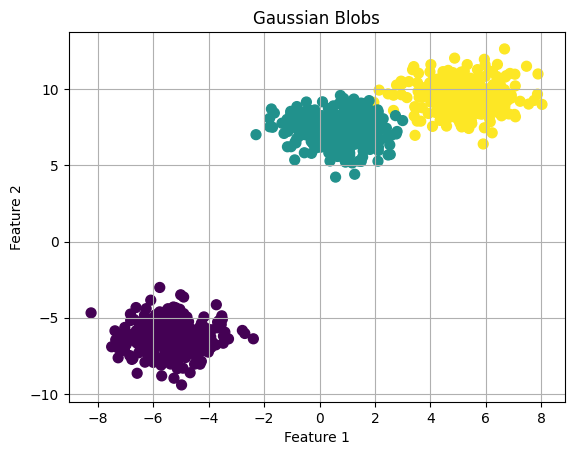

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create a scatter plot
plt.scatter(trainX[:, 0], trainX[:, 1], c=trainY, s=50, cmap='viridis')
plt.title('Gaussian Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [17]:
# initialize our model and display its architecture
mlp = get_training_model().to(DEVICE)
print(mlp)
# initialize optimizer and loss function
opt = SGD(mlp.parameters(), lr=LR) #lr = learning rate adjusted during Gradient Descent process
lossFunc = nn.CrossEntropyLoss() #The standard loss method you’ll use when performing classification with > 2 classes.

Sequential(
  (hidden_layer_1): Linear(in_features=4, out_features=8, bias=True)
  (activation_1): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)


# Training Part

In [18]:
# create a template to summarize current training progress
trainTemplate = "epoch: {} test loss: {:.3f} test accuracy: {:.3f}"
# loop through the epochs
for epoch in range(0, EPOCHS):
    # initialize tracker variables and set our model to trainable
    print("[INFO] epoch: {}...".format(epoch + 1))
    trainLoss = 0
    trainAcc = 0
    samples = 0
    mlp.train()
    # loop over the current batch of data
    for (batchX, batchY) in next_batch(trainX, trainY, BATCH_SIZE):
      # flash data to the current device, run it through our
      # model, and calculate loss
      (batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
      predictions = mlp(batchX)
      loss = lossFunc(predictions, batchY.long())
      # zero the gradients accumulated from the previous steps,
      # perform backpropagation, and update model parameters
      opt.zero_grad()
      loss.backward()
      opt.step()
      # update training loss, accuracy, and the number of samples
      # visited
      trainLoss += loss.item() * batchY.size(0)
      trainAcc += (predictions.max(1)[1] == batchY).sum().item()
      samples += batchY.size(0)

    # display model progress on the current training batch
    trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
    print(trainTemplate.format(epoch + 1, (trainLoss / samples),
      (trainAcc / samples)))

    # initialize tracker variables for testing, then set our model to
    # evaluation mode
    testLoss = 0
    testAcc = 0
    samples = 0

    mlp.eval()
    # initialize a no-gradient context
    with torch.no_grad():
      # loop over the current batch of test data
      for (batchX, batchY) in next_batch(testX, testY, BATCH_SIZE):
        # flash the data to the current device
        (batchX, batchY) = (batchX.to(DEVICE), batchY.to(DEVICE))
        # run data through our model and calculate loss
        predictions = mlp(batchX)
        loss = lossFunc(predictions, batchY.long())
        # update test loss, accuracy, and the number of
        # samples visited
        testLoss += loss.item() * batchY.size(0)
        testAcc += (predictions.max(1)[1] == batchY).sum().item()
        samples += batchY.size(0)
      # display model progress on the current test batch
      testTemplate = "epoch: {} test loss: {:.3f} test accuracy: {:.3f}"
      print(testTemplate.format(epoch + 1, (testLoss / samples),
        (testAcc / samples)))
      print("")

[INFO] epoch: 1...
epoch: 1 train loss: 0.715 train accuracy: 0.820
epoch: 1 test loss: 0.429 test accuracy: 0.993

[INFO] epoch: 2...
epoch: 2 train loss: 0.380 train accuracy: 0.999
epoch: 2 test loss: 0.282 test accuracy: 0.993

[INFO] epoch: 3...
epoch: 3 train loss: 0.267 train accuracy: 1.000
epoch: 3 test loss: 0.208 test accuracy: 1.000

[INFO] epoch: 4...
epoch: 4 train loss: 0.199 train accuracy: 1.000
epoch: 4 test loss: 0.157 test accuracy: 1.000

[INFO] epoch: 5...
epoch: 5 train loss: 0.151 train accuracy: 1.000
epoch: 5 test loss: 0.121 test accuracy: 1.000

[INFO] epoch: 6...
epoch: 6 train loss: 0.117 train accuracy: 1.000
epoch: 6 test loss: 0.096 test accuracy: 1.000

[INFO] epoch: 7...
epoch: 7 train loss: 0.094 train accuracy: 1.000
epoch: 7 test loss: 0.078 test accuracy: 1.000

[INFO] epoch: 8...
epoch: 8 train loss: 0.077 train accuracy: 1.000
epoch: 8 test loss: 0.065 test accuracy: 1.000

[INFO] epoch: 9...
epoch: 9 train loss: 0.064 train accuracy: 1.000
epoc

## Inference | anandsaha github [link](https://github.com/PacktPublishing/Deep-learning-with-PyTorch-video/blob/master/2.training.your.first.neural.network.ipynb)

In [19]:
# Saving model to local machine
torch.save(mlp.state_dict(), 'mlp.pth')

In [20]:
# Load the model for inference

inFeatures, hiddenDim, nbClasses = 4, 8, 3
loaded_model = nn.Sequential(OrderedDict([
    ("hidden_layer_1", nn.Linear(inFeatures, hiddenDim)),
    ("activation_1", nn.ReLU()),
    ("output_layer", nn.Linear(hiddenDim, nbClasses))
]))


loaded_model.load_state_dict(torch.load('mlp.pth'))
loaded_model.eval()

Sequential(
  (hidden_layer_1): Linear(in_features=4, out_features=8, bias=True)
  (activation_1): ReLU()
  (output_layer): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
import torch.nn.functional as F
def inference(x):
    with torch.no_grad():  # Disable gradient calculation for inference
        prediction_logits = loaded_model(x)  # Get raw scores
        prediction_probs = F.softmax(prediction_logits, dim=0)  # Apply softmax to get probabilities
        predicted_class = torch.argmax(prediction_probs).item()
    return predicted_class

: 

In [26]:
index_value = 5
print("Inference Output:",inference(testX[index_value]))
print("Train Data index value:",testY[index_value])

Inference Output: 0
Train Data index value: tensor(0.)
